# 1. Data Preprocessing

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

# Load the data
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Visual Exploration Before Clustering

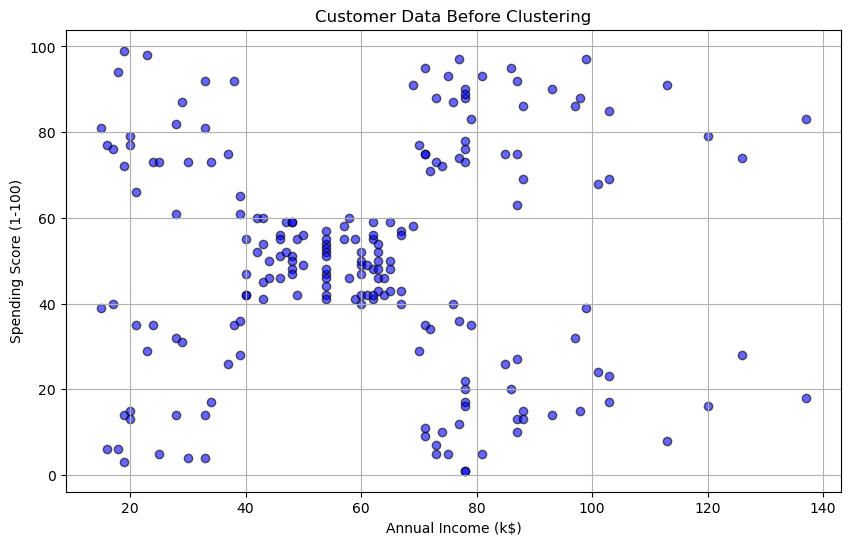

In [2]:
#Visual Exploration Before Clustering

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c='blue', alpha=0.6, edgecolor='k')
plt.title('Customer Data Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# 3. Determining Optimal Number of Clusters

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

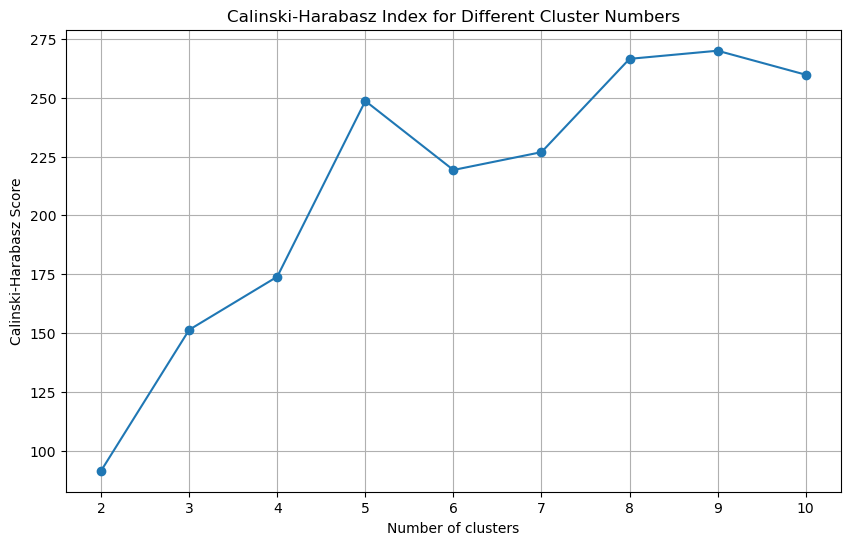

In [32]:
#Determining Optimal Number of Clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# 4. Applying K-Means Clustering

In [10]:
#Applying K-Means Clustering
#From the elbow plot, let's assume 5 clusters is optimal (common for this dataset):

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 5. Visualizing the Clusters

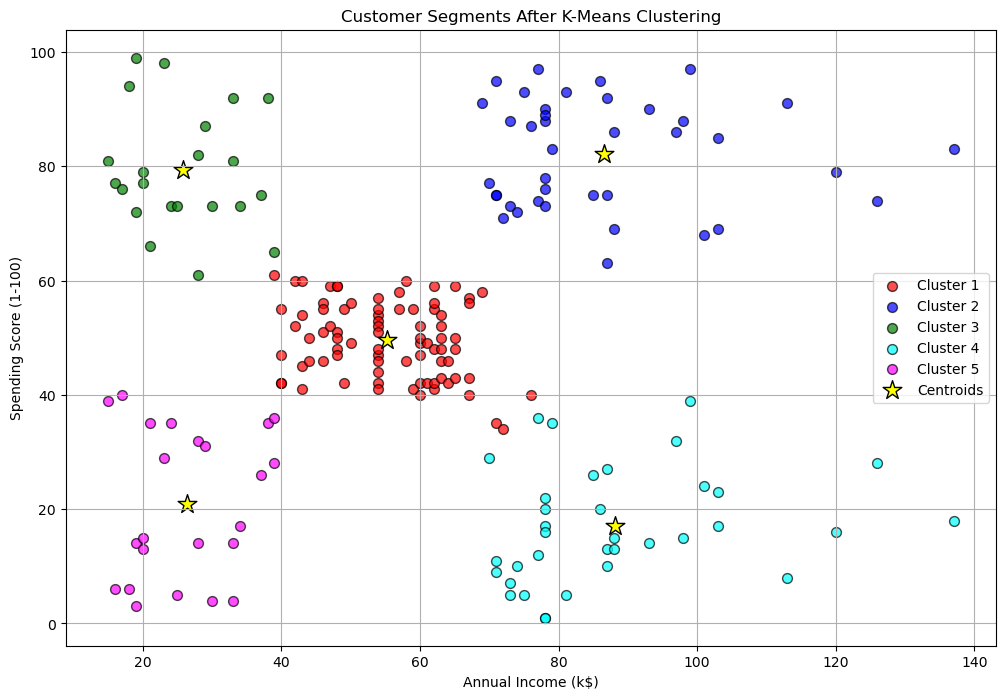

In [12]:
#Visualizing the Clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(df[df['Cluster'] == i]['Annual Income (k$)'], 
                df[df['Cluster'] == i]['Spending Score (1-100)'], 
                s=50, c=colors[i], label=f'Cluster {i+1}', alpha=0.7, edgecolor='k')

# Plot cluster centers (scaled back to original values)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', marker='*', label='Centroids', edgecolor='k')

plt.title('Customer Segments After K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Cluster Interpretation

**The visualization will show 5 distinct customer segments:**

1-Low Income, Low Spending: Customers with below-average income and spending scores

2-Low Income, High Spending: Customers with below-average income but high spending scores

3-Middle Income, Middle Spending: Average customers in both metrics

4-High Income, Low Spending: Customers with above-average income but low spending scores

5-High Income, High Spending: Customers with above-average income and spending scores

# 7. DBSCAN Clustering Implementation

In [36]:
# DBSCAN Clustering Implementation
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise if present)
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Add DBSCAN clusters to dataframe
df['DBSCAN_Cluster'] = dbscan_clusters

DBSCAN found 2 clusters and 8 noise points


# 8. Visualizing DBSCAN Results

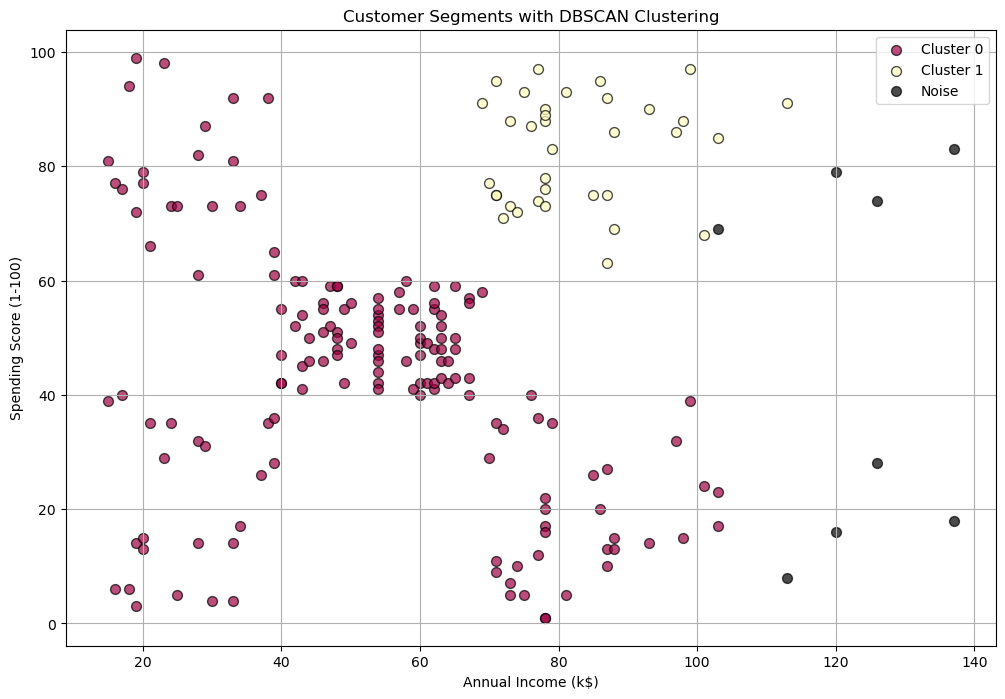

In [38]:
plt.figure(figsize=(12, 8))

# Create list of unique clusters (including noise as -1)
unique_clusters = set(dbscan_clusters)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    # Noise points (cluster = -1) will be shown in black
    if cluster == -1:
        color = 'black'
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    
    plt.scatter(df[df['DBSCAN_Cluster'] == cluster]['Annual Income (k$)'], 
                df[df['DBSCAN_Cluster'] == cluster]['Spending Score (1-100)'], 
                s=50, c=[color], label=label, alpha=0.7, edgecolor='k')

plt.title('Customer Segments with DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# 9. Parameter Tuning for DBSCAN

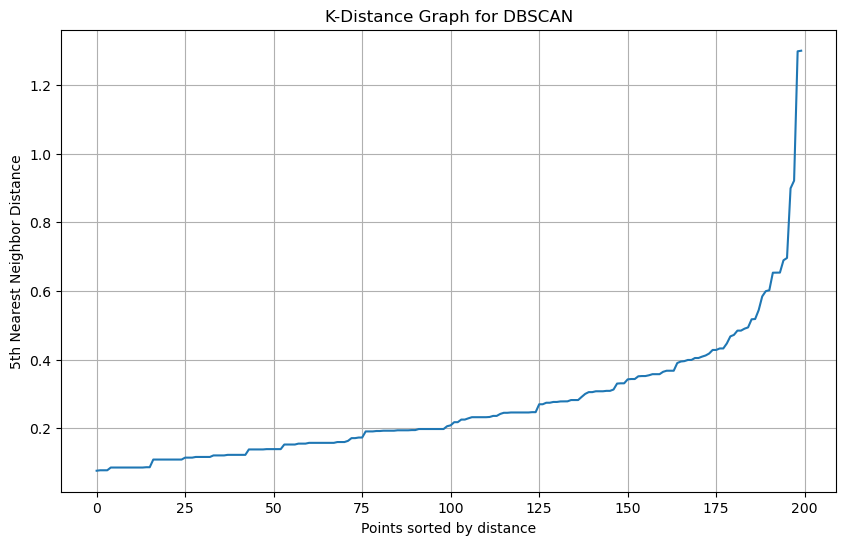

In [40]:
from sklearn.neighbors import NearestNeighbors

# Find the optimal eps value
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Plot k-distance graph
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

# 10. Comparing K-Means and DBSCAN Results

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


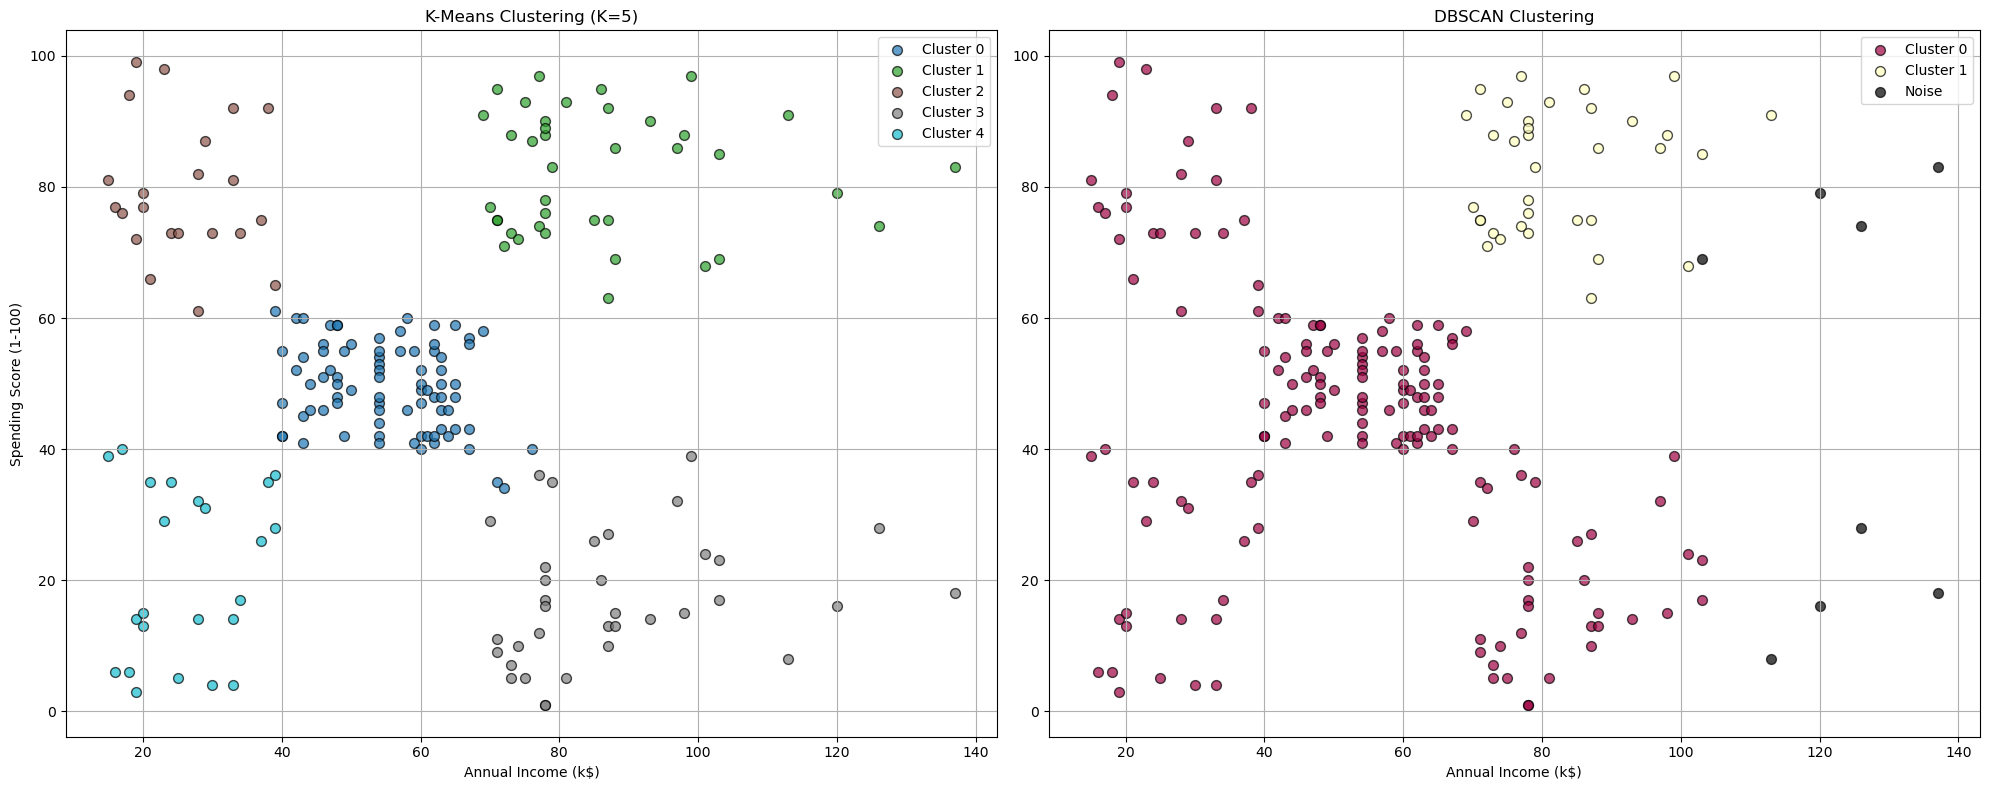

In [42]:
# Apply K-Means for comparison
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_clusters

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot K-Means results
colors = plt.cm.tab10(np.linspace(0, 1, 5))
for i in range(5):
    ax1.scatter(df[df['KMeans_Cluster'] == i]['Annual Income (k$)'], 
                df[df['KMeans_Cluster'] == i]['Spending Score (1-100)'], 
                s=50, c=[colors[i]], label=f'Cluster {i}', alpha=0.7, edgecolor='k')
ax1.set_title('K-Means Clustering (K=5)')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.legend()
ax1.grid(True)

# Plot DBSCAN results
unique_clusters = set(dbscan_clusters)
dbscan_colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))
for cluster, color in zip(unique_clusters, dbscan_colors):
    if cluster == -1:
        color = 'black'
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    ax2.scatter(df[df['DBSCAN_Cluster'] == cluster]['Annual Income (k$)'], 
                df[df['DBSCAN_Cluster'] == cluster]['Spending Score (1-100)'], 
                s=50, c=[color], label=label, alpha=0.7, edgecolor='k')
ax2.set_title('DBSCAN Clustering')
ax2.set_xlabel('Annual Income (k$)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 11. Evaluating Both Methods

In [44]:
# Silhouette scores
kmeans_score = silhouette_score(X_scaled, kmeans_clusters)
dbscan_score = silhouette_score(X_scaled, dbscan_clusters)

print(f"K-Means Silhouette Score: {kmeans_score:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_score:.3f}")

# Number of clusters
print(f"\nK-Means clusters: {len(set(kmeans_clusters))}")
print(f"DBSCAN clusters: {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)}")
print(f"DBSCAN noise points: {list(dbscan_clusters).count(-1)}")

K-Means Silhouette Score: 0.555
DBSCAN Silhouette Score: 0.350

K-Means clusters: 5
DBSCAN clusters: 2
DBSCAN noise points: 8
